# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BACS3013 Data Science Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diabetes Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://floridadiabetesalliance.org/wp-content/uploads/2020/12/chalkboard-with-the-word-diabetes-surrounded-by-fruit-and-a-scale-scaled.jpg" style='width: 300px; height: 250px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries</p>

In [119]:
# 1. choose model class
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [120]:
df = pd.read_csv('diabetes_data_upload.csv')

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [121]:
df.isnull().any().any() # check the missing value

False

In [122]:
df.head() # print the data from head

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [123]:
df.tail() # print the data from tail

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [124]:
# Get the column variable
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [125]:
# Test if missing value exist
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [126]:
df.info() # print the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [127]:

# Mapping for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Mapping for Yes/No Data
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
                  'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
                  'Alopecia', 'Obesity']

for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1})

# Mapping for Positive/Negative Data
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [128]:
# print the correlation of the class
correlation_with_class = df.corr()['class'].abs().sort_values(ascending=False)

print(correlation_with_class)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64


<Axes: >

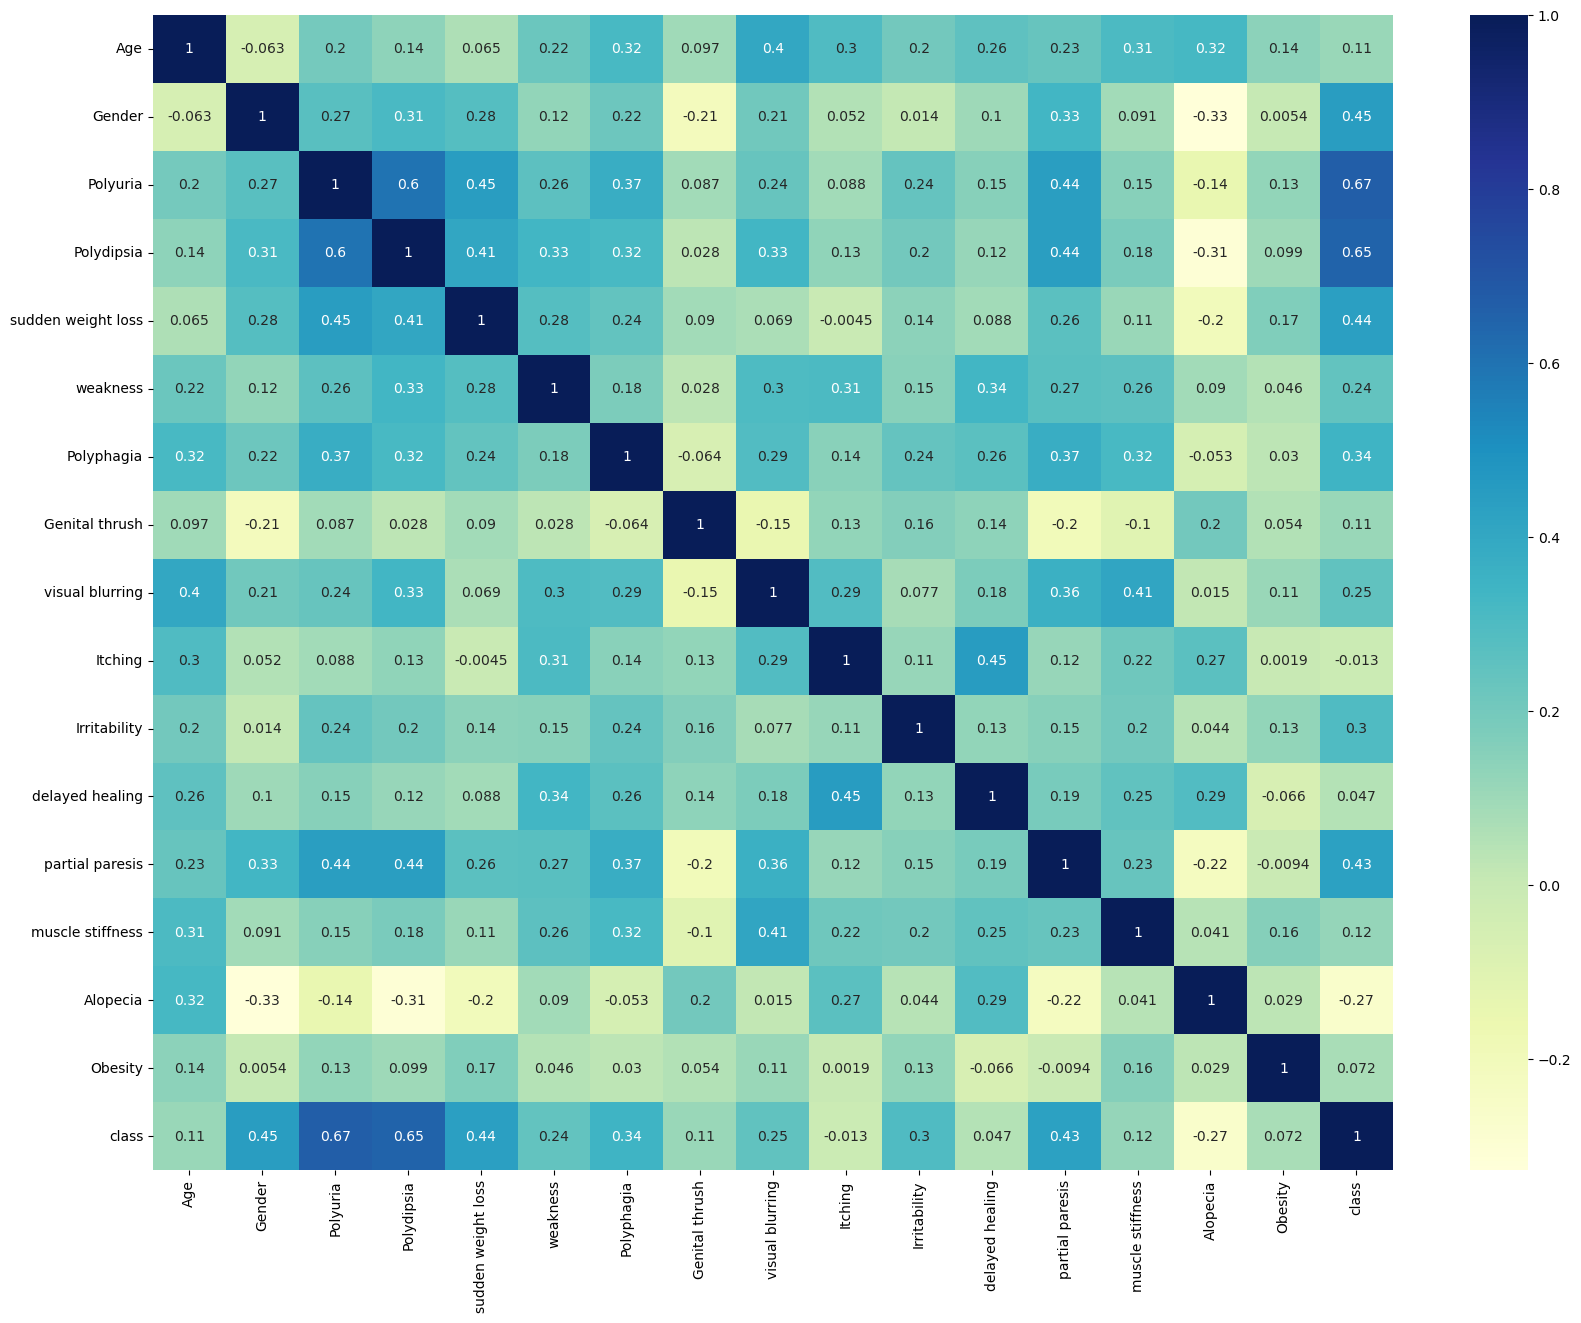

In [129]:
# Display the heatmap

plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [130]:
# show the description of the data
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


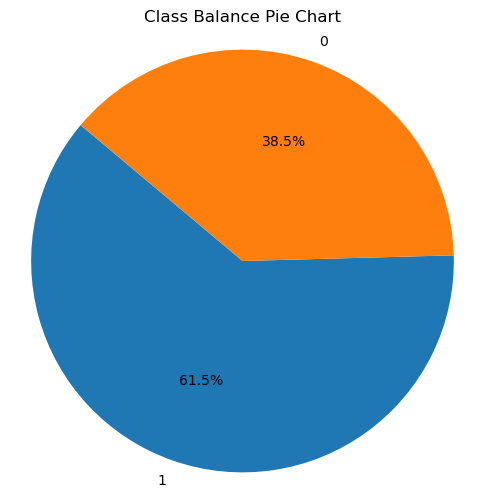

In [131]:
## Pie Chart for class label

# Assuming your CSV has a 'class' column containing class labels
class_column = 'class'

class_counts = df[class_column].value_counts()

# Extract class labels and their counts
labels = class_counts.index
counts = class_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Balance Pie Chart')

# Show the chart
plt.show()


In [132]:
p_values = []
for column in df.drop(columns=['class']):
    feature_positive = df[df['class'] == 1][column]
    feature_negative = df[df['class'] == 0][column]
    _, p_value = ttest_ind(feature_positive, feature_negative)
    p_values.append((column, p_value))

# Select columns with p-value less than a significance level (e.g., 0.05)
significant_columns = [col for col, p_value in p_values if p_value < 0.05]

# Keep only the significant columns
df = df[['class'] + significant_columns]

df.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
0,1,40,0,0,1,0,1,0,0,0,0,0,1,1
1,1,58,0,0,0,0,1,0,0,1,0,1,0,1
2,1,41,0,1,0,0,1,1,0,0,0,0,1,1
3,1,45,0,0,0,1,1,1,1,0,0,0,0,0
4,1,60,0,1,1,1,1,1,0,1,1,1,1,1


In [133]:

# Separate features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Accuracy: 0.9903846153846154


In [134]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and the target variable (y)
X = df.drop('class', axis=1)  # Replace 'target_column' with the name of your target column
y = df['class']

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy
X_resampled, y_resampled = smote.fit_resample(X, y)

# Undersampling using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df= pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)

# Save the resampled dataset to a new CSV file
df.to_csv('resampled_dataset.csv', index=False)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preparation</p>

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Selection</p>



In [135]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 400
Number of Columns: 14


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning And Remove Outliers</p>



In [136]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=5)  # Choose the number of components to keep
principal_components = pca.fit_transform(data_std)

# Select a specific outlier detection method (e.g., Elliptic Envelope)
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust contamination based on your data

# Fit the outlier detector on the reduced data
outlier_detector.fit(principal_components)

# Predict outliers
outliers = outlier_detector.predict(principal_components)

# Print the indices of detected outliers
outlier_indices = [i for i, outlier in enumerate(outliers) if outlier == -1]
print("Indices of detected outliers:", outlier_indices)

Indices of detected outliers: [201, 213, 215, 219, 271, 273, 282, 287, 302, 304, 306, 313, 318, 349, 351, 366, 376, 383, 389, 399]


In [137]:
df = df.drop(df.index[outlier_indices])
df.to_csv("Cleaned_data.csv", index= False)
print("Cleaned Data : ") # Display the cleaned dataframe
print(df)

Cleaned Data : 
     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   1         1   
1     28       0         0           0                   1         0   
2     37       0         0           0                   0         0   
3     34       0         0           0                   0         0   
4     30       0         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
394   50       1         0           1                   0         1   
395   45       1         0           0                   0         0   
396   50       1         1           1                   1         0   
397   35       1         0           0                   0         0   
398   38       1         1           1                   1         1   

     Polyphagia  Genital thrush  visual blurring  Irritability  \
0             0               0                1     

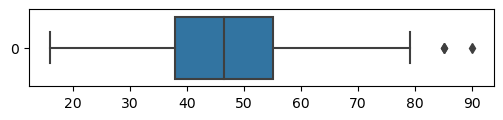

In [138]:
#show age box plot
plt.figure(figsize=(6,1))
sns.boxplot(df["Age"], orient="h")
plt.show()

In [139]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1


outliers = df[((df["Age"]<(q1-1.5*IQR)) | (df["Age"]>(q3+1.5*IQR)))]
outliers

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia,class
206,90,1,0,1,1,0,0,1,1,0,0,1,1,1
255,85,0,1,1,1,1,1,1,1,0,1,1,0,1
270,85,0,1,1,1,1,1,1,1,0,1,1,0,1


In [140]:
df = df[~((df["Age"]<(q1-1.5*IQR)) | (df["Age"]>(q3+1.5*IQR)))]
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia,class
0,40,0,0,1,1,1,0,0,1,0,1,1,0,0
1,28,0,0,0,1,0,0,0,0,0,0,0,0,0
2,37,0,0,0,0,0,0,0,0,0,0,0,0,0
3,34,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,0,0,0,0


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Features Engineering</p>




In [141]:
#List Total Symptoms && Count total number of symptoms
#List / Categorizing Age into Group == Group[20-39, 40-59, 60-100]
#List / Categorizing Genders (Male & Female)

In [142]:
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
            'Genital thrush', 'visual blurring', 'Irritability', 'partial paresis', 
            'muscle stiffness', 'Alopecia']

df['total_symptoms'] = df[symptoms].sum(axis = 1)

print(df)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   1         1   
1     28       0         0           0                   1         0   
2     37       0         0           0                   0         0   
3     34       0         0           0                   0         0   
4     30       0         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
394   50       1         0           1                   0         1   
395   45       1         0           0                   0         0   
396   50       1         1           1                   1         0   
397   35       1         0           0                   0         0   
398   38       1         1           1                   1         1   

     Polyphagia  Genital thrush  visual blurring  Irritability  \
0             0               0                1             0   
1  

In [143]:
age_bins   = [0,20,40,60,100] #Specifies boundary for age group
age_labels = ['1-20','21-40', '41-60', '61-100'] #the labels for each

#pd.cut function categorizes the Age column into specified bins and assgins the label
df['Age_Group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

# Define a threshold age for binary encoding
threshold_age = 40

# Create a new binary column 'Age_Group_Binary' based on the threshold
df['Age_Group_Binary'] = df['Age_Group'].apply(lambda x: 1 if x in ['41-60', '61-100'] else 0)

# Optionally, drop the original 'Age_Group' column if you no longer need it
df.drop(columns=['Age_Group'], inplace=True)

print(df)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   1         1   
1     28       0         0           0                   1         0   
2     37       0         0           0                   0         0   
3     34       0         0           0                   0         0   
4     30       0         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
394   50       1         0           1                   0         1   
395   45       1         0           0                   0         0   
396   50       1         1           1                   1         0   
397   35       1         0           0                   0         0   
398   38       1         1           1                   1         1   

     Polyphagia  Genital thrush  visual blurring  Irritability  \
0             0               0                1             0   
1  

In [144]:
#True indicates 'Male' == 0  && False indicates 'Females' == 1
#Unique == Pandas method, where returns an array or list found in Gender Column
unique_genders = df['Gender'].unique()
gender_counts = df['Gender'].value_counts()

for gender in unique_genders:
    print(f"Total Number of {gender}s: ", gender_counts[gender])

Total Number of 0s:  256
Total Number of 1s:  121



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Split Data Into Training Set and Testing Set,  Normalizing Data</p>



In [145]:
# Define a list of split ratios (in the format (train_ratio, test_ratio))
split_ratios = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Create an empty dictionary to store accuracies and time for each split ratio
results = {}

# Iterate over each split ratio and evaluate accuracy
for train_ratio, test_ratio in split_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['class'], axis=1),  # Replace 'target_column' with your target column name
        df['class'],  # Replace 'target_column' with your target column name
        test_size=test_ratio,
        random_state=42
    )

    # Start measuring time
    start_time = time.time()

    # Create and train a machine learning model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy for the current split ratio
    accuracy = accuracy_score(y_test, y_pred)

    # Stop measuring time
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time

    # Store accuracy and time in the results dictionary
    results[f'{int(train_ratio * 100)}-{int(test_ratio * 100)}'] = {
        'accuracy': accuracy,
        'time': elapsed_time
    }

# Print the accuracies and times for each split ratio
for ratio, data in results.items():
    print(f'Split Ratio {ratio}: Accuracy = {data["accuracy"]:.4f}, Time = {data["time"]:.4f} seconds')

Split Ratio 50-50: Accuracy = 0.9471, Time = 0.2085 seconds
Split Ratio 60-40: Accuracy = 0.9205, Time = 0.2542 seconds
Split Ratio 70-30: Accuracy = 0.9123, Time = 0.1718 seconds
Split Ratio 80-20: Accuracy = 0.9211, Time = 0.1820 seconds
Split Ratio 90-10: Accuracy = 0.9474, Time = 0.1790 seconds


In [146]:
X = df.drop(columns=['class'])  # Features (excluding the target variable)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-Nearest Neighbors (KNN)</p>


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Compare the KNN value to find out the Best Value</p>


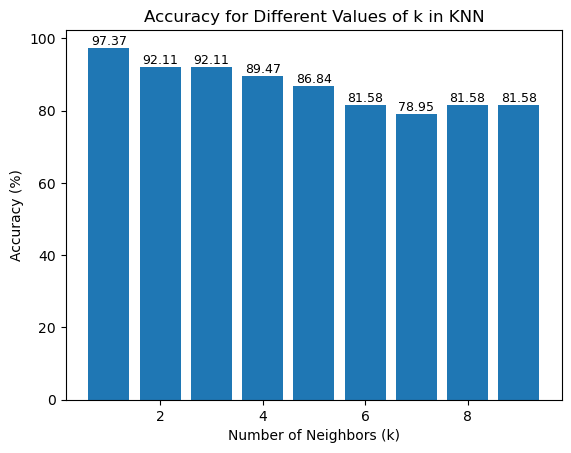

In [147]:
# Try different values of k for KNN
k_values = range(1, 10)  

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = (accuracy_score(y_test, y_pred)) * 100
    accuracies.append(accuracy)

# Create a bar chart to compare accuracies for different k values
plt.bar(k_values, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Values of k in KNN')

# Add the numeric values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    
plt.show()






# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Fitting with K-cross and Validation</p>


In [148]:
# consider the labels of the 5 nearest data points to a given input when making a prediction.
knn = KNeighborsClassifier(n_neighbors = 1) 

# Fit model to data
knn.fit(X_train, y_train)

# Predict on new data
X_test = np.array(X_test)
knn_pred = knn.predict(X_test)




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report for K-Nearest Neighbors (KNN)</p>


In [149]:
print(classification_report(y_test,knn_pred))
knn_pre = precision_score(y_test, knn_pred) * 100
knn_rec = recall_score(y_test, knn_pred)* 100
knn_f1 = f1_score(y_test, knn_pred)* 100

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38





# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix for K-Nearest Nighbors(KNN)</p>


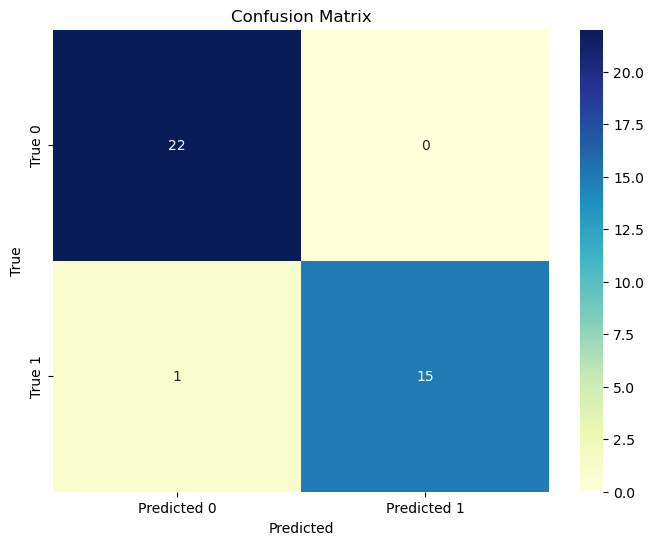

In [150]:
knn_cm = confusion_matrix(y_test, knn_pred)

# show the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">False Positive Rate and Accuracy Score</p>


In [151]:
knn_FP = (knn_cm[0][1]).astype(float)  
knn_TN = (knn_cm[0][0]).astype(float)

# Fall out or false positive rate
knn_FPR = knn_FP/(knn_FP+knn_TN)*100
print("False Positive Rate of KNN : " + str(round(knn_FPR,10)) + " %")


# Evaluate performance
knn_accuracyScore = (accuracy_score(y_test, knn_pred)) * 100
print('Accuracy Score : {:.3f}%'.format(knn_accuracyScore))

False Positive Rate of KNN : 0.0 %
Accuracy Score : 97.368%



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machine (SVM / SVC)</p>


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">SVM Hyperparameter Tuning</p>


In [152]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

#measure time duration of tuning process
start_time = time.time() 

#systematically searching and selecting the best combination of hyperparameter
svc_grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)

#fit model to data
svc_grid.fit(X_train, y_train)

#prediction
svc_pred=svc_grid.predict(X_test)
end_time = time.time()
elapsed_time = (end_time - start_time)
average_time = elapsed_time / 125

print(f"\nTotal Time taken: {elapsed_time:.4f} seconds")
print(f"Average Time taken: {average_time:.4f} seconds")
# average

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END ....C=1000, gam

In [153]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, probability=True)



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report for SVM</p>


In [154]:
print(classification_report(y_test,svc_pred))
svc_pre = precision_score(y_test, svc_pred) * 100
svc_rec = recall_score(y_test, svc_pred)* 100
svc_f1 = f1_score(y_test, svc_pred)* 100


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


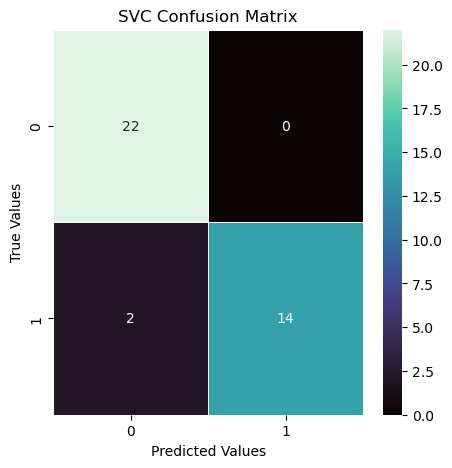

In [155]:
svc_cm = confusion_matrix(y_test,svc_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(svc_cm,annot=True, fmt='d',linewidths=0.5,cmap='mako')
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">False Positive Rate and Accuracy Score</p>


In [156]:
#formulas
svc_FP = (svc_cm[0][1]).astype(float)  
svc_TN = (svc_cm[0][0]).astype(float)
svc_TP = (svc_cm[1][1]).astype(float)  
svc_FN = (svc_cm[1][0]).astype(float)
    

In [157]:
# Fall out or false positive rate / true postive rate
svc_FPR = svc_FP/(svc_FP+svc_TN)*100
svc_TPR = svc_TP/(svc_TP+svc_FN)*100
print("False Positive Rate of SVC : " + str(round(svc_FPR,2)) + " %")
print("True Positive Rate of SVC : " + str(round(svc_TPR,2)) + " %")

#model accuracy
svc_acc = (svc_grid.score(X_test, y_test)) * 100
print('SVC accuracy : {:.2f}%'.format(svc_acc))

False Positive Rate of SVC : 0.0 %
True Positive Rate of SVC : 87.5 %
SVC accuracy : 94.74%


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>

1.We import the necessary libraries.

4.Create a Random Forest classifier 

5.Train the classifier on the training data.

6.Make predictions on the test data.

7.Calculate and print the accuracy of the model.



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Bar Chart Compare Estimators</p>


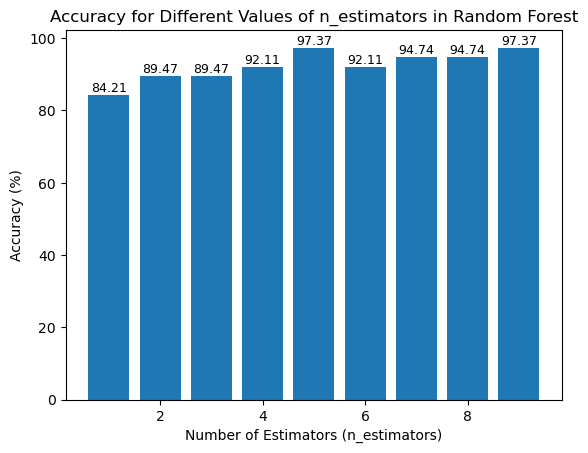

In [158]:
# Try different values of n_estimators for Random Forest
n_estimators_values = range(1, 10) 

accuracies = []

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = (accuracy_score(y_test, y_pred)) * 100
    accuracies.append(accuracy)

# Create a bar chart to compare accuracies for different n_estimators values
plt.bar(n_estimators_values, accuracies)
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Values of n_estimators in Random Forest')

# Add the numeric values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest Classifier</p>


In [159]:
# Create a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the classifier on the training data
rfc_classifier.fit(X_train, y_train)

# Make predictions on the test data
rfc_pred = rfc_classifier.predict(X_test)


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [160]:
print(classification_report(y_test,rfc_pred))
rfc_pre = precision_score(y_test, rfc_pred) * 100
rfc_rec = recall_score(y_test, rfc_pred)* 100
rfc_f1 = f1_score(y_test, rfc_pred)* 100


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


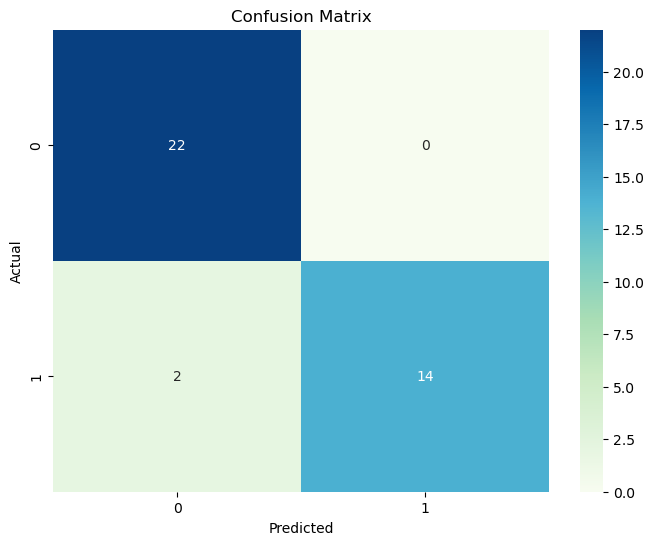

In [161]:
# Create a confusion matrix
rfc_cm = confusion_matrix(y_test, rfc_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">False Positive Rate and Accuracy Score</p>


In [162]:
rfc_FP = (rfc_cm[0][1]).astype(float)  
rfc_TN = (rfc_cm[0][0]).astype(float)

# Fall out or false positive rate
rfc_FPR = rfc_FP/(rfc_FP+rfc_TN)*100
print("False Positive Rate of Random Forest Classifier : " + str(round(rfc_FPR,2)) + " %")

# Calculate the accuracy of the model
rfc_acc = accuracy_score(y_test, rfc_pred) * 100
print("Accuracy: {:.3f}%".format(rfc_acc))

False Positive Rate of Random Forest Classifier : 0.0 %
Accuracy: 94.737%



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression</p>

In [163]:
# Create the linear regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = model.predict(X_test)




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [164]:
print(classification_report(y_test,lr_pred))
lr_pre = precision_score(y_test, lr_pred) * 100
lr_rec = recall_score(y_test, lr_pred)* 100
lr_f1 = f1_score(y_test, lr_pred)* 100


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.87      0.81      0.84        16

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.86        38
weighted avg       0.87      0.87      0.87        38




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


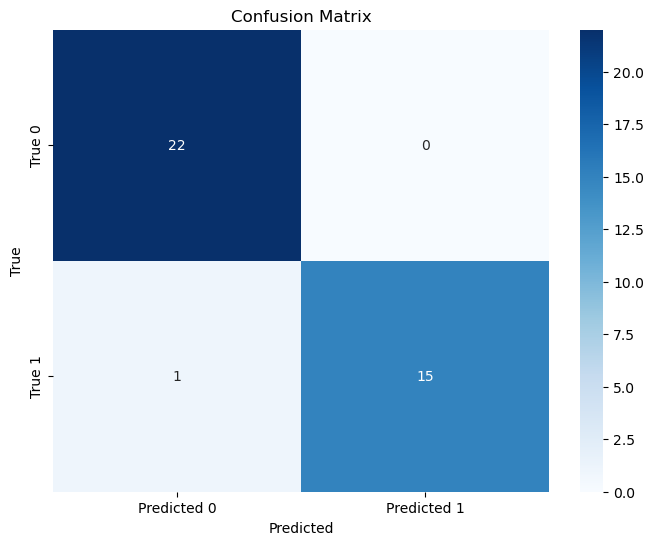

In [165]:
lr_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">False Positive Rate and Accuracy Score</p>


In [166]:
lr_FP = (lr_cm[0][1]).astype(float)  
lr_TN = (lr_cm[0][0]).astype(float)

# Fall out or false positive rate
lr_FPR = lr_FP/(lr_FP+lr_TN)*100
print("False Positive Rate of Logistic Regression : " + str(round(lr_FPR,2)) + " %")

# Calculate the accuracy
lr_acc = (accuracy_score(y_test, lr_pred)) * 100
print("Accuracy:, {:.3f}%".format(lr_acc))

False Positive Rate of Logistic Regression : 0.0 %
Accuracy:, 86.842%



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Evaluation</p>

In [167]:
al_name = ['KNN','SVC','Random Forest', 'Logistic Regression']
acc_all = [(al)for al in [knn_accuracyScore, svc_acc, rfc_acc, lr_acc]]
pre_all = [(al)for al in [knn_pre, svc_pre, rfc_pre,lr_pre]]
rec_all = [(al)for al in [knn_rec,svc_rec , rfc_rec,lr_rec]]
f1_all = [(al)for al in [knn_f1,svc_f1, rfc_f1,lr_f1]]
fpr_all = [(al)for al in [knn_FPR,svc_FPR, rfc_FPR,lr_FPR]]

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy</p>

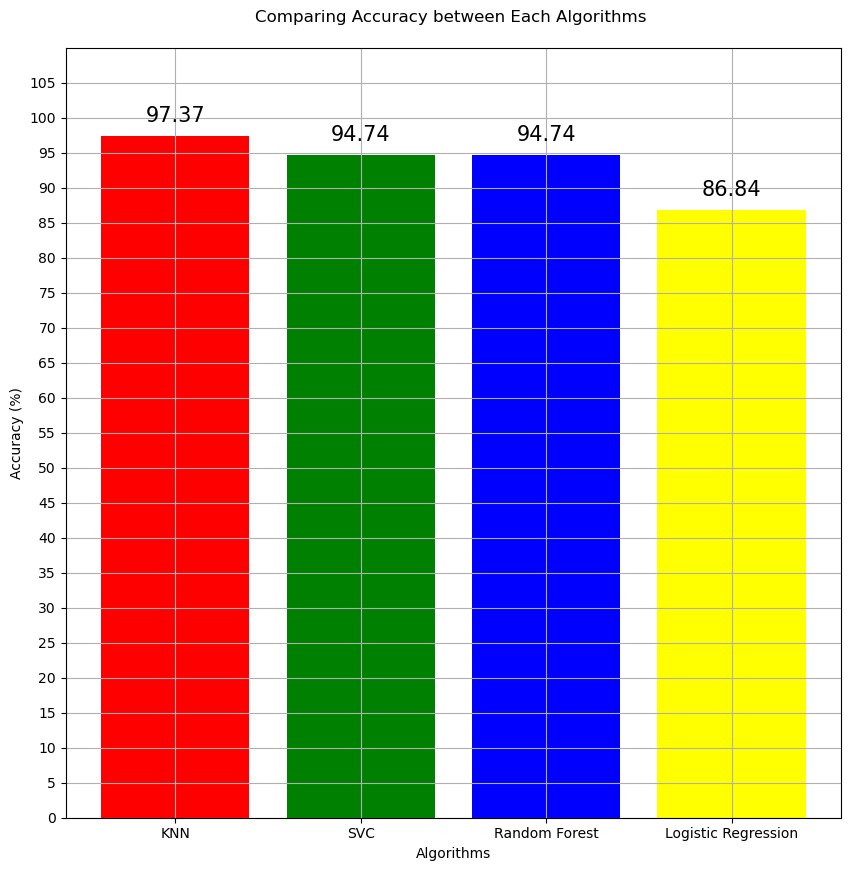

In [168]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=acc_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Accuracy between Each Algorithms \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithms")
plt.show()



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Precision</p>

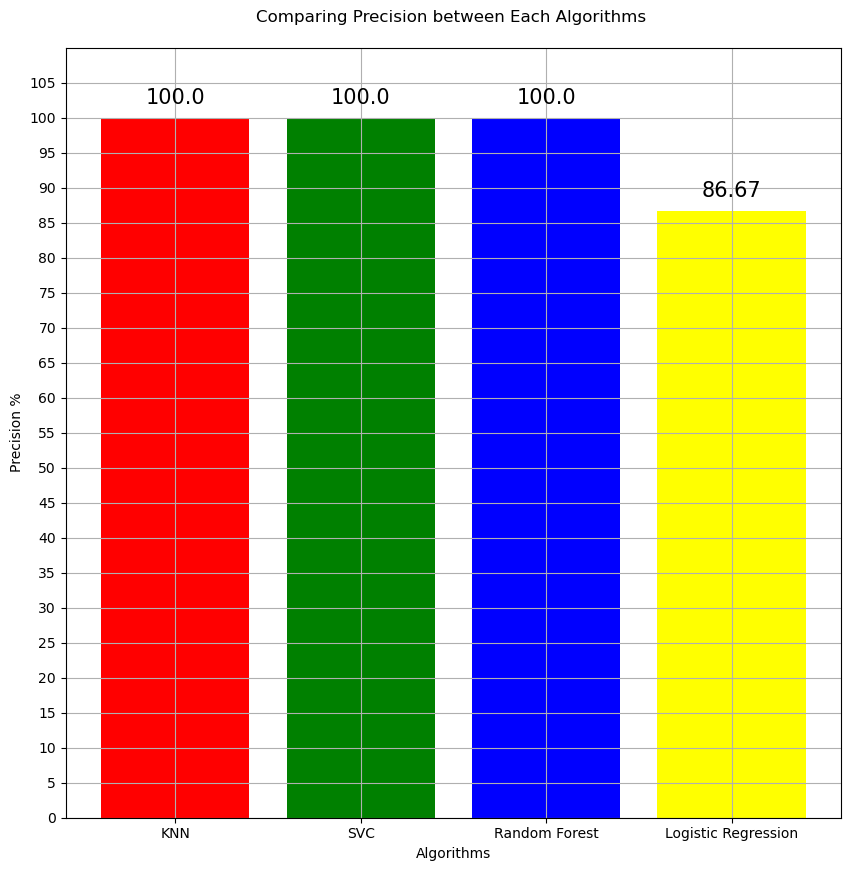

In [169]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=pre_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Precision between Each Algorithms \n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Recall</p>

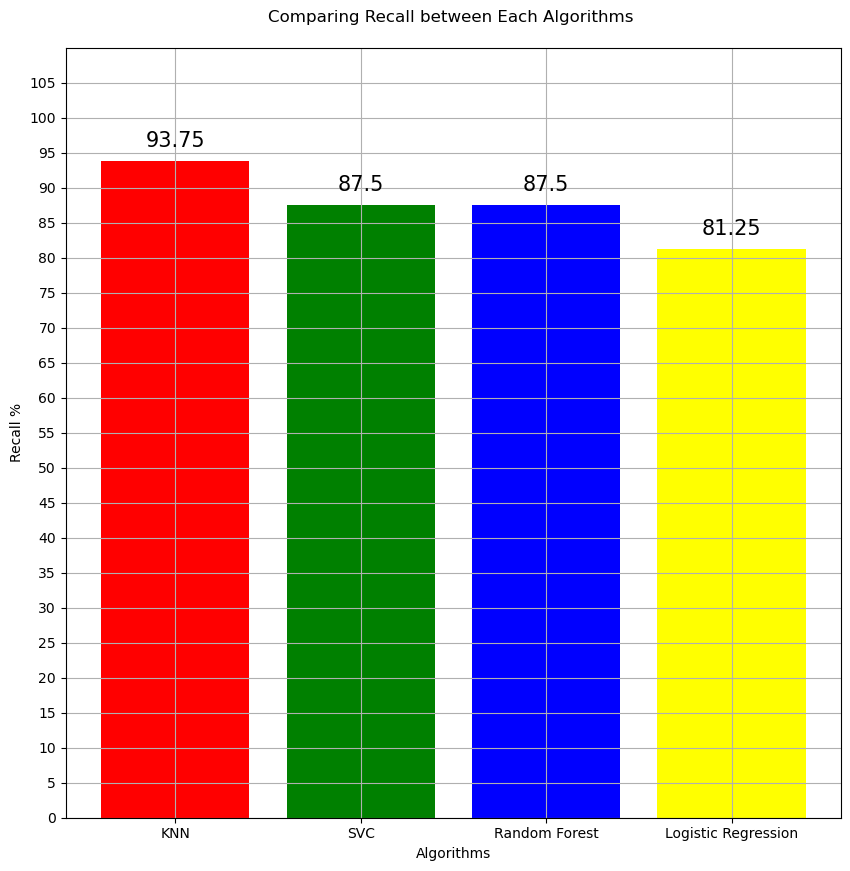

In [170]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=rec_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Recall between Each Algorithms \n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">F1 - Score</p>

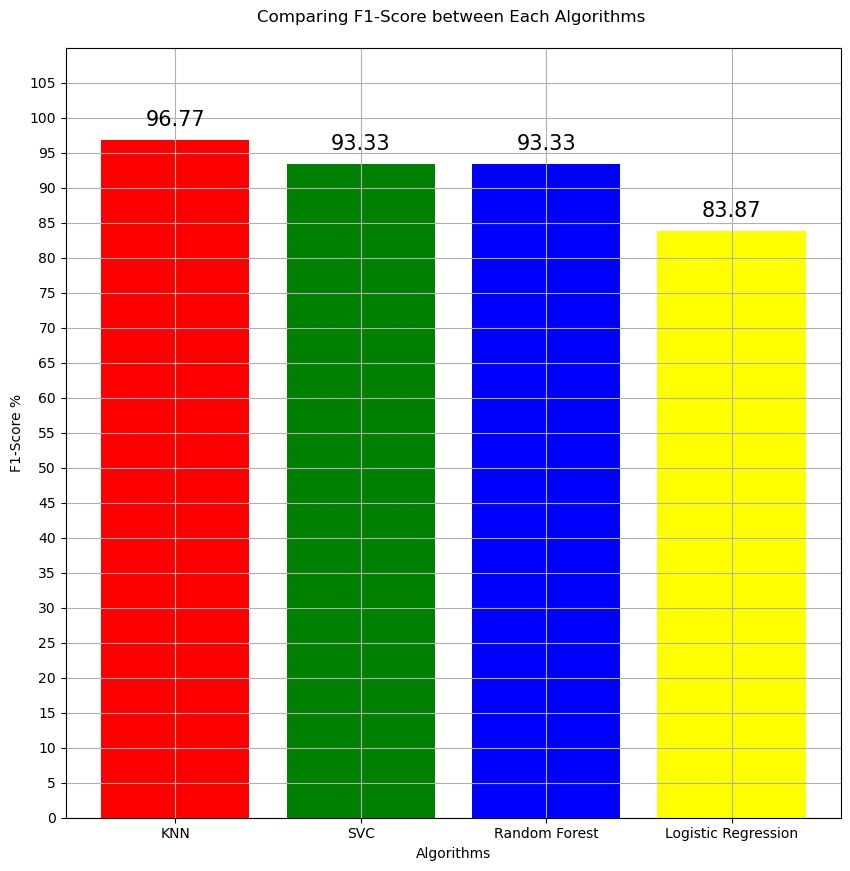

In [171]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=f1_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing F1-Score between Each Algorithms \n")
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Specificity</p>

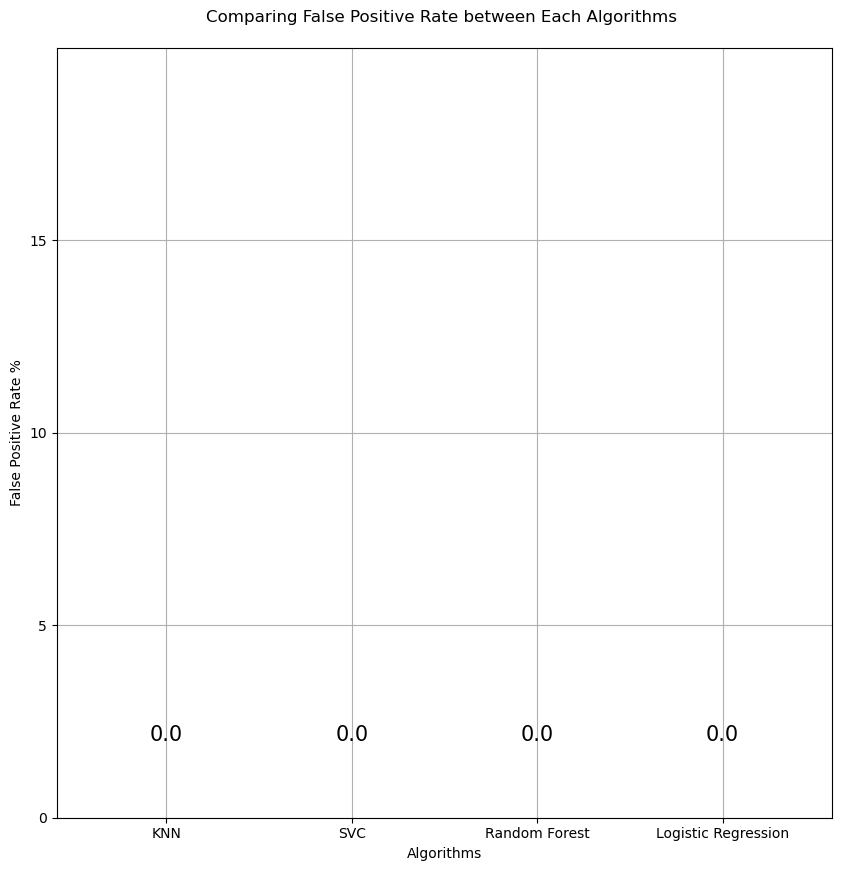

In [172]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=fpr_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,20))
plt.yticks(np.arange(0,20,5))
plt.title("Comparing False Positive Rate between Each Algorithms \n")
plt.ylabel("False Positive Rate %")
plt.xlabel("Algorithms")
plt.show()


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Deployment</p>

In [173]:
import pickle 
pickle.dump(knn,open('diabetes_prediction_model','wb'))


In [174]:
import pickle
import pandas as pd
model_loaded = pickle.load(open('diabetes_prediction_model','rb'))
def validate_yes_no_input(input_str):
    input_str = input_str.lower()
    return input_str == "yes" or input_str == "no"

def main():
        print("Early stage diabetes risk prediction")
        print("========================================================")
        try:
                age = float(input("Enter Age: "))
                gender = input("Enter Gender (M/F): ")
                if gender not in ["M", "F"]: 
                        raise ValueError("Invalid gender input. Please enter 'M' or 'F'.")
                
                polyuria = input("Do you have Polyuria? (yes/no): ")
                if not validate_yes_no_input(polyuria):
                        raise ValueError("Invalid input for Polyuria. Please enter 'yes' or 'no'.")
                
                polydipsia = input("Do you have Polydipsia? (yes/no): ")
                if not validate_yes_no_input(polydipsia):
                        raise ValueError("Invalid input for Polydipsia. Please enter 'yes' or 'no'.")
                
                sudden_weight_loss = input("Experiencing Sudden Weight Loss? (yes/no): ")
                if not validate_yes_no_input(sudden_weight_loss):
                        raise ValueError("Invalid input for Sudden Weight Loss. Please enter 'yes' or 'no'.")
                
                weakness = input("Do you feel Weakness? (yes/no): ")
                if not validate_yes_no_input(weakness):
                        raise ValueError("Invalid input for Weakness. Please enter 'yes' or 'no'.")
                
                polyphagia = input("Do you have Polyphagia? (yes/no): ")
                if not validate_yes_no_input(polyphagia):
                        raise ValueError("Invalid input for Polyphagia. Please enter 'yes' or 'no'.")
                
                genital_thrush = input("Do you have Genital Thrush? (yes/no): ")
                if not validate_yes_no_input(genital_thrush):
                        raise ValueError("Invalid input for Genital Thrush. Please enter 'yes' or 'no'.")
                
                visual_blurring = input("Experiencing Visual Blurring? (yes/no): ")
                if not validate_yes_no_input(visual_blurring):
                        raise ValueError("Invalid input for Visual Blurring. Please enter 'yes' or 'no'.")
                
                irritability = input("Are you Irritable? (yes/no): ")
                if not validate_yes_no_input(irritability):
                        raise ValueError("Invalid input for Irritable. Please enter 'yes' or 'no'.")
                partial_paresis = input("Do you have Partial Paresis? (yes/no): ")
                if not validate_yes_no_input(partial_paresis):
                        raise ValueError("Invalid input for Partial Paresis. Please enter 'yes' or 'no'.")
                muscle_stiffness = input("Experiencing Muscle Stiffness? (yes/no): ")
                if not validate_yes_no_input(muscle_stiffness):
                        raise ValueError("Invalid input for Muscle Stiffness. Please enter 'yes' or 'no'.")
                alopecia = input("Do you have Alopecia? (yes/no): ")
                if not validate_yes_no_input(alopecia):
                        raise ValueError("Invalid input for Alopecia. Please enter 'yes' or 'no'.")

        except ValueError as e:
                print(f"Error: {e}")

        data = {
        'Age': [age],
        'Gender': [gender],
        'Polyuria': [polyuria],
        'Polydipsia': [polydipsia],
        'sudden weight loss': [sudden_weight_loss],
        'weakness': [weakness],
        'Polyphagia': [polyphagia],
        'Genital thrush': [genital_thrush],
        'visual blurring': [visual_blurring],
        'Irritability': [irritability],
        'partial paresis': [partial_paresis],
        'muscle stiffness': [muscle_stiffness],
        'Alopecia': [alopecia]
        }

        #label encode
        df = pd.DataFrame(data)
        df.replace({"no": 0, "yes": 1}, inplace=True)
        df.replace({"M": 0, "F":1},inplace=True)

        #total symptoms
        symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                'Genital thrush', 'visual blurring', 'Irritability', 'partial paresis', 
                'muscle stiffness', 'Alopecia']
        df['total_symptoms'] = df[symptoms].sum(axis = 1)

        #categorize age groups
        age_bins   = [0,20,40,60,100] #Specifies boundary for age group
        age_labels = ['1-20','21-40', '41-60', '61-100'] #the labels for each
        df['Age_Group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)
        threshold_age = 40
        df['Age_Group_Binary'] = df['Age_Group'].apply(lambda x: 1 if x in ['41-60', '61-100'] else 0)
        df.drop(columns=['Age_Group'], inplace=True)
        X = df

        y = model_loaded.predict(X)
        if y == 0:
               prediction = 'negative'
        else:
                prediction = 'positive' 

        print("The prediction is", prediction)

In [175]:
main()

Early stage diabetes risk prediction
Enter Age: 21
Enter Gender (M/F): M
Do you have Polyuria? (yes/no): no
Do you have Polydipsia? (yes/no): no
Experiencing Sudden Weight Loss? (yes/no): no
Do you feel Weakness? (yes/no): no
Do you have Polyphagia? (yes/no): no
Do you have Genital Thrush? (yes/no): no
Experiencing Visual Blurring? (yes/no): no
Are you Irritable? (yes/no): no
Do you have Partial Paresis? (yes/no): no
Experiencing Muscle Stiffness? (yes/no): no
Do you have Alopecia? (yes/no): no
The prediction is negative
